In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_text


# Membuat DataFrame dari data set
df = pd.read_excel('cancer_patient.xlsx',sheet_name='Sheet1')


# Pisahkan fitur dan label
X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
        'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
        'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
        'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']]
y = df['Level']

In [ ]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
999,P999,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
df.shape

(1000, 25)

In [ ]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

**Check overview of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
df['Patient Id'].value_counts()

P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64

In [ ]:
df['Age'].value_counts()

35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: Age, dtype: int64

In [ ]:
df['Gender'].value_counts()

1    598
2    402
Name: Gender, dtype: int64

In [ ]:
df['Air Pollution'].value_counts()

6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: Air Pollution, dtype: int64

In [ ]:
df['Alcohol use'].value_counts()

2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: Alcohol use, dtype: int64

In [ ]:
df['Dust Allergy'].value_counts()

7    405
4    133
5    111
6    110
3    101
2     70
1     60
8     10
Name: Dust Allergy, dtype: int64

In [ ]:
df['OccuPational Hazards'].value_counts()

7    365
3    151
2    132
5    130
4    112
1     50
6     30
8     30
Name: OccuPational Hazards, dtype: int64

In [ ]:
df['Genetic Risk'].value_counts()

7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: Genetic Risk, dtype: int64

In [ ]:
df['chronic Lung Disease'].value_counts()

6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronic Lung Disease, dtype: int64

In [ ]:
df['Balanced Diet'].value_counts()

7    296
2    231
3    173
6    159
4     61
5     40
1     40
Name: Balanced Diet, dtype: int64

In [ ]:
df['Obesity'].value_counts()

7    356
3    193
4    191
2    140
1     70
6     30
5     20
Name: Obesity, dtype: int64

In [ ]:
df['Smoking'].value_counts()

2    222
7    207
1    181
3    172
8     89
6     60
4     59
5     10
Name: Smoking, dtype: int64

In [ ]:
df['Passive Smoker'].value_counts()

2    284
7    187
4    161
3    140
8    108
1     60
6     30
5     30
Name: Passive Smoker, dtype: int64

In [ ]:
df['Chest Pain'].value_counts()

7    296
4    191
2    181
3    153
1     80
6     40
8     30
9     19
5     10
Name: Chest Pain, dtype: int64

In [ ]:
df['Coughing of Blood'].value_counts()

7    187
4    172
3    171
2    121
8    119
1     71
9     60
5     50
6     49
Name: Coughing of Blood, dtype: int64

In [ ]:
df['Fatigue'].value_counts()

3    212
2    211
4    180
1    110
8    109
5     89
6     50
9     39
Name: Fatigue, dtype: int64

In [ ]:
df['Weight Loss'].value_counts()

2    280
7    230
3    150
1    121
5    100
4     60
6     49
8     10
Name: Weight Loss, dtype: int64

In [ ]:
df['Shortness of Breath'].value_counts()

2    243
6    201
3    140
4     90
7     89
5     87
1     80
9     70
Name: Shortness of Breath, dtype: int64

In [ ]:
df['Wheezing'].value_counts()

2    240
5    171
4    163
1    149
7    139
6     68
3     60
8     10
Name: Wheezing, dtype: int64

In [ ]:
df['Swallowing Difficulty'].value_counts()

1    221
4    189
2    160
5    110
8    110
6     91
3     90
7     29
Name: Swallowing Difficulty, dtype: int64

In [ ]:
df['Clubbing of Finger Nails'].value_counts()

2    240
4    220
1    131
5    120
3    100
9     80
8     59
7     40
6     10
Name: Clubbing of Finger Nails, dtype: int64

In [ ]:
df['Frequent Cold'].value_counts()

3    230
2    192
4    180
6    170
1    139
7     69
5     20
Name: Frequent Cold, dtype: int64

In [ ]:
df['Dry Cough'].value_counts()

2    251
7    168
4    141
5    131
1    119
3    101
6     89
Name: Dry Cough, dtype: int64

In [ ]:
df['Snoring'].value_counts()

2    300
3    211
1    170
5    139
4    131
6     39
7     10
Name: Snoring, dtype: int64

In [ ]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

**Tidy Up the Data**

In [ ]:
#We change Gender data type and value to make it easier to read, so it should be an object, but in df.info() it is listed as interger. Need to change it into string
#convert interger to string
df['Gender'].astype(int).astype(str)

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    2
997    2
998    2
999    1
Name: Gender, Length: 1000, dtype: object

In [ ]:
#Binary Encoding Categorical to Numeric of Gender
df_encode={"Gender": {1:"Male",2:"Female"}}
df=df.replace(df_encode)

In [ ]:
df.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,Male,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,Male,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,Male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,Male,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,Male,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,Male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,Female,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,Female,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,Female,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,Male,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


**Check Null data for each columns**

In [ ]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# Classification

In [ ]:

# Lakukan encoding pada fitur kategori
le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_encoded = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pilih algoritma Decision Tree
model = DecisionTreeClassifier()

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("CLASSIFICATION DECISION TREE")
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

CLASSIFICATION DECISION TREE
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:

# Lakukan encoding pada fitur kategori
le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_encoded = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pilih algoritma Regresi Logistik
model = LogisticRegression(max_iter=1000)  # Maksimum iterasi untuk konvergensi

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("CLASSIFICATION WITH BINARY / MULTINOMIAL LOGISTIC REGRESSION")
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


CLASSIFICATION WITH BINARY / MULTINOMIAL LOGISTIC REGRESSION
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Lakukan encoding pada fitur kategori
le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_encoded = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pilih algoritma K-Nearest Neighbors
k_value = 5  # Ganti dengan nilai K yang diinginkan
model = KNeighborsClassifier(n_neighbors=k_value)

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("CLASSIFICATION WITH KNN")
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

CLASSIFICATION WITH KNN
Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      0.98      0.99        55
      Medium       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
# Lakukan encoding pada fitur kategori
le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_encoded = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pilih algoritma Naive Bayes (Gaussian Naive Bayes untuk fitur numerik)
model = GaussianNB()

# Latih model
model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("CLASSIFICATION WITH NAIVE BAYES")
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


CLASSIFICATION WITH NAIVE BAYES
Accuracy: 0.895
Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.96      0.91        82
         Low       1.00      0.85      0.92        55
      Medium       0.85      0.84      0.85        63

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [ ]:


# Lakukan encoding pada fitur kategori
le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X_encoded = pd.get_dummies(X)

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Pilih algoritma Decision Tree Classifier
model = DecisionTreeClassifier()

# Latih model
model.fit(X_train, y_train)

# Menampilkan decision tree sebagai teks
tree_rules = export_text(model, feature_names=list(X_encoded.columns))
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Coughing of Blood <= 5.50
|   |--- Wheezing <= 4.50
|   |   |--- Snoring <= 4.50
|   |   |   |--- Obesity <= 4.50
|   |   |   |   |--- class: Low
|   |   |   |--- Obesity >  4.50
|   |   |   |   |--- Passive Smoker <= 6.50
|   |   |   |   |   |--- class: Medium
|   |   |   |   |--- Passive Smoker >  6.50
|   |   |   |   |   |--- class: High
|   |   |--- Snoring >  4.50
|   |   |   |--- class: Medium
|   |--- Wheezing >  4.50
|   |   |--- class: Medium
|--- Coughing of Blood >  5.50
|   |--- Air Pollution <= 1.50
|   |   |--- class: Medium
|   |--- Air Pollution >  1.50
|   |   |--- Obesity <= 2.50
|   |   |   |--- class: Low
|   |   |--- Obesity >  2.50
|   |   |   |--- Clubbing of Finger Nails <= 1.50
|   |   |   |   |--- class: Medium
|   |   |   |--- Clubbing of Finger Nails >  1.50
|   |   |   |   |--- class: High



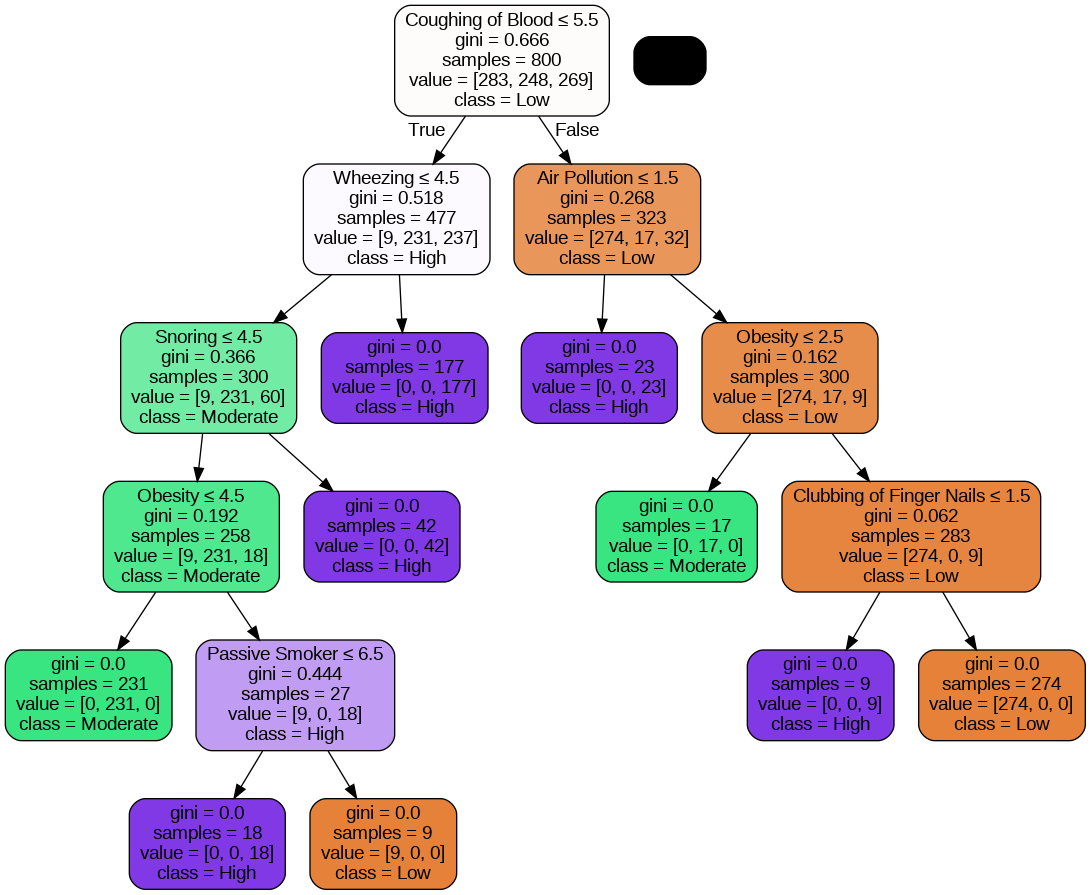

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Menampilkan decision tree sebagai grafik
dot_data = export_graphviz(model, out_file=None, feature_names=list(X_encoded.columns),
                           class_names=['Low', 'Moderate', 'High'],
                           filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
